In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_taxi = pd.read_csv('./3_taxi_peru.csv', sep=';', engine='python', parse_dates=['start_at', 'end_at', 'arrived_at'])

df_taxi


,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [182]:
#4

df_selected_dates = df_taxi[["driver_id", "user_id", "start_at", "end_at", "arrived_at", "start_type",  "end_state"]]

df_selected_dates.loc[:, 'start_at'] = pd.to_datetime(df_selected_dates['start_at'])

df_selected_dates.loc[:, 'end_at'] = pd.to_datetime(df_selected_dates['end_at'])

df_selected_dates.loc[:, 'arrived_at'] = pd.to_datetime(df_selected_dates['arrived_at'])

df_filtered_by_start_type = df_selected_dates.query("start_type == 'reserved' | start_type == 'asap'").copy()

df_filtered_by_start_type

,driver_id,user_id,start_at,end_at,arrived_at,start_type,end_state
0,583949a89a9ee17d19e3ca4f137b6b4c,0e9af5bbf1edfe591b54ecdfd7e91e26,2010-11-16 16:44:00,2010-11-16 17:29:00,2010-11-16 17:02:00,asap,drop off
1,NaN,a553c46e3a22fb9c326aeb3d72b3334e,2010-06-01 00:34:00,2010-06-01 00:37:00,NaT,asap,not found
2,NaN,a553c46e3a22fb9c326aeb3d72b3334e,2010-05-31 05:01:00,2010-05-31 05:04:00,NaT,asap,not found
3,NaN,a553c46e3a22fb9c326aeb3d72b3334e,2010-06-01 00:29:00,2010-06-01 00:32:00,NaT,asap,not found
4,d665fb9f75ef5d9cd0fd89479380ba78,56772d544fdfa589a020a1ff894a86f7,2010-09-11 23:55:00,2010-09-12 01:07:00,2010-09-11 23:50:00,reserved,drop off
...,...,...,...,...,...,...,...
23106,d665fb9f75ef5d9cd0fd89479380ba78,8998bb370b5f0cec43a373adebba0c72,2010-07-31 13:15:00,2010-07-31 13:27:00,2010-07-31 13:15:00,reserved,drop off
23107,17c21284245ff240c7212732991c2373,5f8a6ffef0ea5df78a8ee890267b60ec,2010-10-02 05:26:00,2010-10-02 05:56:00,2010-10-02 05:39:00,asap,drop off
23108,4851ee4c867c9b49b909c1adb76c31e9,c0ffb6f6cd801004dd8609c12277c2d1,2010-09-21 09:56:00,2010-09-21 10:18:00,2010-09-21 10:05:00,asap,drop off
23109,56f59b58bcbbd1cdabc3652e713134c2,c0ffb6f6cd801004dd8609c12277c2d1,2010-04-29 04:30:00,2010-04-29 05:11:00,2010-04-29 04:23:00,reserved,drop off


In [183]:
#5

df_filtered_by_start_type.loc[:, 'wait_time'] = (df_filtered_by_start_type['arrived_at'] - df_filtered_by_start_type['start_at']).dt.total_seconds() / 60

df_filtered_by_start_type


,driver_id,user_id,start_at,end_at,arrived_at,start_type,end_state,wait_time
0,583949a89a9ee17d19e3ca4f137b6b4c,0e9af5bbf1edfe591b54ecdfd7e91e26,2010-11-16 16:44:00,2010-11-16 17:29:00,2010-11-16 17:02:00,asap,drop off,18.0
1,NaN,a553c46e3a22fb9c326aeb3d72b3334e,2010-06-01 00:34:00,2010-06-01 00:37:00,NaT,asap,not found,NaN
2,NaN,a553c46e3a22fb9c326aeb3d72b3334e,2010-05-31 05:01:00,2010-05-31 05:04:00,NaT,asap,not found,NaN
3,NaN,a553c46e3a22fb9c326aeb3d72b3334e,2010-06-01 00:29:00,2010-06-01 00:32:00,NaT,asap,not found,NaN
4,d665fb9f75ef5d9cd0fd89479380ba78,56772d544fdfa589a020a1ff894a86f7,2010-09-11 23:55:00,2010-09-12 01:07:00,2010-09-11 23:50:00,reserved,drop off,-5.0
...,...,...,...,...,...,...,...,...
23106,d665fb9f75ef5d9cd0fd89479380ba78,8998bb370b5f0cec43a373adebba0c72,2010-07-31 13:15:00,2010-07-31 13:27:00,2010-07-31 13:15:00,reserved,drop off,0.0
23107,17c21284245ff240c7212732991c2373,5f8a6ffef0ea5df78a8ee890267b60ec,2010-10-02 05:26:00,2010-10-02 05:56:00,2010-10-02 05:39:00,asap,drop off,13.0
23108,4851ee4c867c9b49b909c1adb76c31e9,c0ffb6f6cd801004dd8609c12277c2d1,2010-09-21 09:56:00,2010-09-21 10:18:00,2010-09-21 10:05:00,asap,drop off,9.0
23109,56f59b58bcbbd1cdabc3652e713134c2,c0ffb6f6cd801004dd8609c12277c2d1,2010-04-29 04:30:00,2010-04-29 05:11:00,2010-04-29 04:23:00,reserved,drop off,-7.0


In [184]:
#6

df_filtered_by_start_type.loc[:, 'wait_time'] = (df_filtered_by_start_type['arrived_at'] - df_filtered_by_start_type['start_at']).dt.total_seconds() / 60

df_lated_taxi = df_filtered_by_start_type.query("wait_time > 0.0")

df_latest_driver = df_lated_taxi.groupby("driver_id").agg({"driver_id" : "count"})

print("Максимальное количество у водителя: " + f"{df_latest_driver.max()}")
print("Айди водителя, имеющего максимальное количество опазданий: " + f"{df_latest_driver.idxmax()}")


Максимальное количество у водителя: driver_id    1018
dtype: int64
Айди водителя, имеющего максимальное количество опазданий: driver_id    c814db2127582cf95dea1f74f43127c2
dtype: object


In [185]:
#7

df_filtered_by_start_type.loc[:, 'month'] = df_filtered_by_start_type['start_at'].dt.month

df_filtered_by_start_type.loc[:, 'month_name'] = df_filtered_by_start_type['start_at'].dt.month_name()

df_filtered_by_start_type.loc[:, 'weekday'] = df_filtered_by_start_type['start_at'].dt.day_name()


df_filtered_by_start_type

,driver_id,user_id,start_at,end_at,arrived_at,start_type,end_state,wait_time,month,month_name,weekday
0,583949a89a9ee17d19e3ca4f137b6b4c,0e9af5bbf1edfe591b54ecdfd7e91e26,2010-11-16 16:44:00,2010-11-16 17:29:00,2010-11-16 17:02:00,asap,drop off,18.0,11,November,Tuesday
1,NaN,a553c46e3a22fb9c326aeb3d72b3334e,2010-06-01 00:34:00,2010-06-01 00:37:00,NaT,asap,not found,NaN,6,June,Tuesday
2,NaN,a553c46e3a22fb9c326aeb3d72b3334e,2010-05-31 05:01:00,2010-05-31 05:04:00,NaT,asap,not found,NaN,5,May,Monday
3,NaN,a553c46e3a22fb9c326aeb3d72b3334e,2010-06-01 00:29:00,2010-06-01 00:32:00,NaT,asap,not found,NaN,6,June,Tuesday
4,d665fb9f75ef5d9cd0fd89479380ba78,56772d544fdfa589a020a1ff894a86f7,2010-09-11 23:55:00,2010-09-12 01:07:00,2010-09-11 23:50:00,reserved,drop off,-5.0,9,September,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
23106,d665fb9f75ef5d9cd0fd89479380ba78,8998bb370b5f0cec43a373adebba0c72,2010-07-31 13:15:00,2010-07-31 13:27:00,2010-07-31 13:15:00,reserved,drop off,0.0,7,July,Saturday
23107,17c21284245ff240c7212732991c2373,5f8a6ffef0ea5df78a8ee890267b60ec,2010-10-02 05:26:00,2010-10-02 05:56:00,2010-10-02 05:39:00,asap,drop off,13.0,10,October,Saturday
23108,4851ee4c867c9b49b909c1adb76c31e9,c0ffb6f6cd801004dd8609c12277c2d1,2010-09-21 09:56:00,2010-09-21 10:18:00,2010-09-21 10:05:00,asap,drop off,9.0,9,September,Tuesday
23109,56f59b58bcbbd1cdabc3652e713134c2,c0ffb6f6cd801004dd8609c12277c2d1,2010-04-29 04:30:00,2010-04-29 05:11:00,2010-04-29 04:23:00,reserved,drop off,-7.0,4,April,Thursday


<Axes: xlabel='quantity_orders', ylabel='month_name'>

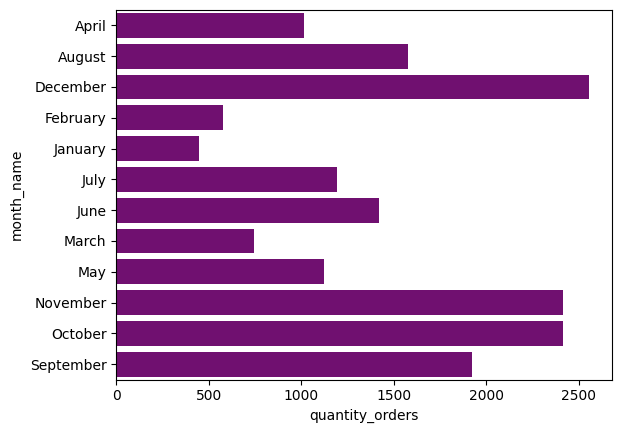

In [201]:
#8

%matplotlib inline

df_quantity_orders_executed = df_filtered_by_start_type.query("end_state == 'drop off'").groupby("month_name").agg({"end_state" : "count"}).rename(columns={"end_state" : "quantity_orders"}).reset_index()

df_quantity_orders_executed

sns.barplot(x="quantity_orders", y="month_name", data=df_quantity_orders_executed, color="purple")



<Axes: xlabel='weekday', ylabel='quantity_orders'>

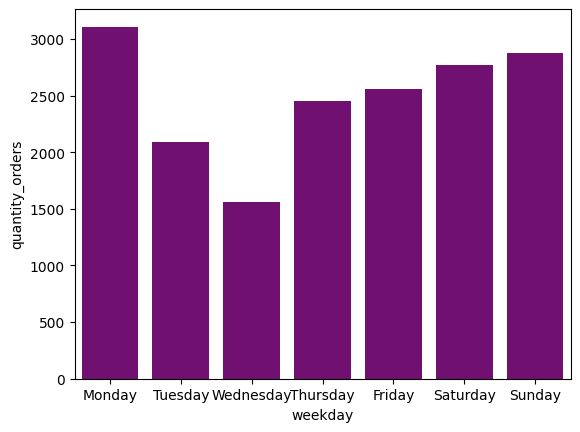

In [198]:
#9

df_weekday = df_filtered_by_start_type.query("end_state == 'drop off'").groupby("weekday").agg({"end_state" : "count"}).rename(columns={"end_state" : "quantity_orders"}).reset_index()

df_weekday

sns.barplot(x="weekday", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], y="quantity_orders", data=df_weekday, color="Purple")

In [193]:
#10.1

df_unique_users_per_day = df_filtered_by_start_type.query("end_state == 'drop off'").groupby("weekday").agg({"user_id" : "nunique"}).rename(columns={"user_id" : "DAU"})

df_unique_users_per_day


,DAU
weekday,
Friday,478
Monday,597
Saturday,508
Sunday,553
Thursday,471
Tuesday,611
Wednesday,504


In [192]:
#10.2

df_filtered_by_start_type.loc[:, 'week_number'] = df_filtered_by_start_type['start_at'].dt.isocalendar().week

df_unique_users_per_week = df_unique_users_per_day = df_filtered_by_start_type.query("end_state == 'drop off'").groupby("week_number").agg({"user_id" : "nunique"}).rename(columns={"user_id" : "WAU"})

df_unique_users_per_week

,WAU
week_number,
1,29
2,44
3,38
4,32
5,45
6,49
7,48
8,46
9,38


<Axes: xlabel='MAU', ylabel='month_name'>

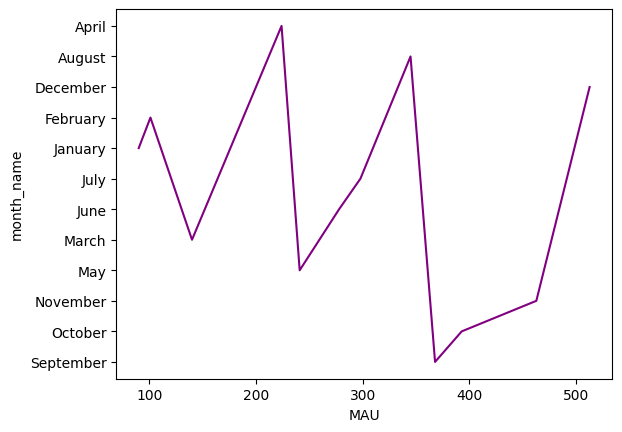

In [204]:
#10.3

df_unique_users_per_month = df_filtered_by_start_type.query("end_state == 'drop off'").groupby("month_name").agg({"user_id" : "nunique"}).rename(columns={"user_id" : "MAU"})

df_unique_users_per_month

sns.lineplot(x="MAU", y="month_name", data=df_unique_users_per_month, color="Purple")